# Yolov5 커스텀 데이터학습
---

In [1]:
# public roboflow com으로 가자
!gdown https://public.roboflow.com/ds/IzCUn8JbZq?key=wzuPMDap54

Downloading...
From: https://public.roboflow.com/ds/IzCUn8JbZq?key=wzuPMDap54
To: /content/IzCUn8JbZq?key=wzuPMDap54
100% 12.1M/12.1M [00:00<00:00, 38.8MB/s]


In [2]:
!unzip /content/IzCUn8JbZq?key=wzuPMDap54

Archive:  /content/IzCUn8JbZq?key=wzuPMDap54
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: export/
   creating: export/images/
 extracting: export/images/raccoon-100_jpg.rf.YWIftfgUdZqJLTkvI9W2.jpg  
 extracting: export/images/raccoon-101_jpg.rf.ebfr15yC06H7KdSNWJkC.jpg  
 extracting: export/images/raccoon-102_jpg.rf.Vtizg4N4D1Wn9fv4sBaJ.jpg  
 extracting: export/images/raccoon-103_jpg.rf.yx4ScGFA2FZ23qfitAfV.jpg  
 extracting: export/images/raccoon-104_jpg.rf.HdpZVmq1teO4b2ny0HJO.jpg  
 extracting: export/images/raccoon-105_jpg.rf.S4P0w34qeFrLIhNIHmuD.jpg  
 extracting: export/images/raccoon-106_jpg.rf.UCuMtEoBFF5lvbYSErKC.jpg  
 extracting: export/images/raccoon-107_jpg.rf.pQbBB9zNruyNhePH5B52.jpg  
 extracting: export/images/raccoon-108_jpg.rf.qFSgit2nhskdamOaI6Nm.jpg  
 extracting: export/images/raccoon-109_jpg.rf.LzEfJ28WbPo5OxpukIGd.jpg  
 extracting: export/images/raccoon-10_jpg.rf.umSu38h2FUXMMT9rA

In [8]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 14944, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 14944 (delta 2), reused 1 (delta 0), pack-reused 14936
Receiving objects: 100% (14944/14944), 13.99 MiB | 30.75 MiB/s, done.
Resolving deltas: 100% (10261/10261), done.


In [13]:
# !pip install -r requirements.txt

In [16]:
%ls

bin/      dev/   lib32/  NGC-DL-CONTAINER-LICENSE  root/  sys/    var/
boot/     etc/   lib64/  opt/                      run/   tmp/
content/  home/  media/  proc/                     sbin/  tools/
datalab/  lib/   mnt/    python-apt/               srv/   usr/


In [21]:
from glob import glob

# 밑에 *모든이미지를 glob함수로 list로 만들어준다.
img_list = glob('/content/dataset/export/images/*.jpg')

In [24]:
from sklearn.model_selection import train_test_split

train_image,val_image = train_test_split(img_list,
                               test_size=0.2)

In [27]:
print(len(train_image),len(val_image))

156 40


In [28]:
with open('/content/dataset/train.txt','w') as f:
  # 파일이 열려있는 상태
  f.write('\n'.join(train_image)+'\n')

In [30]:
with open('/content/dataset/val.txt','w')as f:
  f.write('\n'.join(val_image)+'\n')

In [31]:
# yaml 수정
import yaml

with open('/content/dataset/data.yaml','r') as f:
  data = yaml.load(f,Loader=yaml.FullLoader)
  # 여긴 열림(with문)

#여긴 닫혀있음
print(data)

data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'

with open('/content/dataset/data.yaml','w') as f:
  yaml.dump(data,f)

{'train': '/content/dataset/train.txt', 'val': '/content/dataset/val.txt', 'nc': 1, 'names': ['raccoon']}


In [32]:
%cd /content/yolov5

/content/yolov5


In [36]:
# img 사이즈는 416*416
!python train.py --img 416 --batch 16 --epochs 50 --data /content/dataset/data.yaml --cfg /content/yolov5/models/yolov5s.yaml --weights yolov5s.pt --name racoon_yolov5s

train: weights=yolov5s.pt, cfg=/content/yolov5/models/yolov5s.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=racoon_yolov5s, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-61-gcaba2ae Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anc

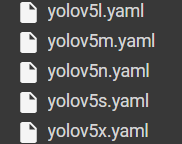

위로 올라갈수록 크기가 커짐 weight가 무거워짐

### inference

In [41]:
from IPython.display import Image
import os

val_img_path = val_image[1]
print(val_img_path)


/content/dataset/export/images/raccoon-98_jpg.rf.rAeGjNwLevttDW7jAQal.jpg


In [42]:
!python detect.py --weights /content/yolov5/runs/train/racoon_yolov5s/weights/best.pt --save-txt --img 416 --conf 0.5 --source "{val_img_path}"


detect: weights=['/content/yolov5/runs/train/racoon_yolov5s/weights/best.pt'], source=/content/dataset/export/images/raccoon-98_jpg.rf.rAeGjNwLevttDW7jAQal.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-61-gcaba2ae Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/dataset/export/images/raccoon-98_jpg.rf.rAeGjNwLevttDW7jAQal.jpg: 416x416 1 raccoon, 8.1ms
Speed: 0.4ms pre-process, 8.1ms inference, 4.0ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp
1 labels saved to runs/detect/exp/